## Script to take the csv's coming out of fl_trainer.py and plot backdoor accuracy plots as well as norm difference plots

Instructions:
1. Load all the dataframes from the csvs
2. Make sure you update df_list[]
3. Choose plot_filename as that is going to be the filename of the plot that is saved
4. If you have more than 2 dataframes, you will need to replicate code in cell 4.
5. Play with cell 6 if you want to analyze norm differences

In [1]:
import numpy
import re
import pandas as pd

from matplotlib import colors as mcolors
from pylab import *
%matplotlib inline

In [2]:
# load all the datafiles you want to plot here

plot_filename = "ardis_edge_case_vs_normal_case.pdf"
df1 = pd.read_csv("ardis_results/ardis_blackbox_edge_case_no_defense_acc_results.csv")
df2 = pd.read_csv("ardis_results/ardis_blackbox_normal_case_no_defense_acc_results.csv")

df_list = [df1, df2]

df1.head() # just to make sure it looks fine

,fl_iter,main_task_acc,backdoor_acc,raw_task_acc,adv_norm_diff,wg_norm
0,0,88.0000,11.0,0.000,0.000000,0.000000
1,1,90.9075,51.0,96.700,2.315781,9.961054
2,2,91.2775,39.0,93.675,0.000000,10.023683
3,3,91.1400,30.0,95.150,0.000000,10.062332
4,4,92.5900,45.0,96.350,0.000000,10.091765


In [3]:
# increasing this makes the curve smoother but less informative
SMOOTHING_WINDOW=10

for df in df_list:
    df['backdoor_acc_smooth'] = df.backdoor_acc.rolling(window=10, min_periods=1).mean()

<Figure size 1440x1152 with 0 Axes>

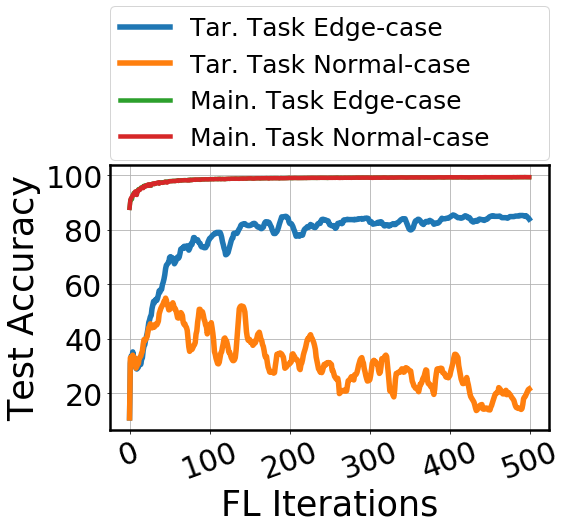

In [4]:
fig = plt.figure(figsize=(20, 16))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500

# tar acc
df1[:observation_window].plot(x='fl_iter', y='backdoor_acc_smooth', linestyle='-',
                              ax=ax, linewidth=5.5, color="C0", markersize=20, markevery=1,
                              label=r"Tar. Task Edge-case")

df2[:observation_window].plot(x='fl_iter', y='backdoor_acc_smooth', linestyle='-',
                              ax=ax, linewidth=5.5, color="C1", markersize=20, markevery=1,
                              label=r"Tar. Task Normal-case")

# entire acc
df1[:observation_window].plot(x='fl_iter', y='main_task_acc', linestyle='-',
                              ax=ax, linewidth=4.5, color="C2", markersize=20, markevery=1,
                              label=r"Main. Task Edge-case")

df2[:observation_window].plot(x='fl_iter', y='main_task_acc', linestyle='-',
                              ax=ax, linewidth=4.5, color="C3", markersize=20, markevery=1,
                              label=r"Main. Task Normal-case")



plt.xlabel("FL Iterations",fontsize=35)
plt.ylabel("Test Accuracy",fontsize=35)
plt.xticks(size=30, rotation=20)
plt.yticks(size=30)
#plt.ylim(60, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':25}
ax.xaxis.get_offset_text().set_fontsize(25)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
plt.savefig(plot_filename, format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)

<Figure size 1440x1152 with 0 Axes>

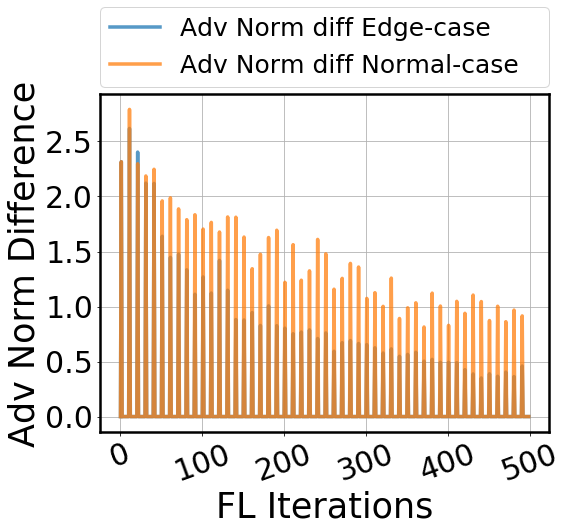

In [5]:
fig = plt.figure(figsize=(20, 16))
#fig = plt.figure(figsize=(6, 4))
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 7.5))
ax = plt.subplot(111)
observation_window = 500

# tar acc
df1[:observation_window].plot(x='fl_iter', y='adv_norm_diff', linestyle='-', alpha=0.75,
                              ax=ax, linewidth=3.5, color="C0", markersize=20, markevery=1,
                              label=r"Adv Norm diff Edge-case")

df2[:observation_window].plot(x='fl_iter', y='adv_norm_diff', linestyle='-', alpha=0.75,
                              ax=ax, linewidth=3.5, color="C1", markersize=20, markevery=1,
                              label=r"Adv Norm diff Normal-case")


plt.xlabel("FL Iterations",fontsize=35)
plt.ylabel("Adv Norm Difference",fontsize=35)
plt.xticks(size=30, rotation=20)
plt.yticks(size=30)
#plt.ylim(60, 90)
#plt.xlim(-1, 80)
legend_properties = {'size':25}
ax.xaxis.get_offset_text().set_fontsize(25)
ax.xaxis.get_offset_text().set_weight('bold')
#ax.legend(prop=legend_properties)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0., prop=legend_properties)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop=legend_properties)
plt.grid()
plt.tight_layout()
#plt.savefig("norm_difference_plot.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)